# Análise BI

In [196]:
import json
from urllib.request import urlopen
import requests
import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import storage
from io import StringIO



In [107]:
api_key = "irtzpwJmKEKLvuT80bKLqIgJfXZBUps0"

stock_symbol = "AMER3.SA"

In [108]:
url = f"https://financialmodelingprep.com/api/v3/profile/{stock_symbol}?apikey={api_key}"

In [109]:
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [110]:
get_jsonparsed_data(url)

[{'symbol': 'AMER3.SA',
  'price': 0.87,
  'beta': 0.793,
  'volAvg': 20647518,
  'mktCap': 785193778,
  'lastDiv': 0,
  'range': '0.64-12.21',
  'changes': -0.01,
  'companyName': 'Americanas S.A.',
  'currency': 'BRL',
  'cik': None,
  'isin': 'BRAMERACNOR6',
  'cusip': None,
  'exchange': 'São Paulo',
  'exchangeShortName': 'SAO',
  'industry': 'Internet Retail',
  'website': 'https://ri.americanas.com',
  'description': "Americanas S.A. operates in the e-commerce business in Brazil. It connects people, businesses, products, and services on the digital platform to offer various digital solutions. The company operates Americanas.com, an online store with various products in approximately 40 categories; Submarino, a digital brand in books, games, technology, and entertainment; Shoptime, a home shopping channel that offers bed, table, bath, small appliances, housewares, and sports and leisure products; Sou Barato, an outlet that offers repackaged products; Lojas Americanas; Americanas 

In [111]:
def get_historical_data(symbol, api_key, start_date, end_date):
    """
    Obtém dados históricos da ação para o período especificado.
    """
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start_date}&to={end_date}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    return data


# Defina os períodos para análise
start_date_2022 = "2022-01-01"
end_date_2022 = "2022-12-31"
start_date_2023 = "2023-01-01"
end_date_2023 = "2023-12-31"

# Obter dados históricos
historical_data_2022 = get_historical_data(stock_symbol, api_key, start_date_2022, end_date_2022)
historical_data_2023 = get_historical_data(stock_symbol, api_key, start_date_2023, end_date_2023)


In [187]:
# Converter os dados para um DataFrame para análise
df_2022 = pd.DataFrame(historical_data_2022['historical'])
df_2023 = pd.DataFrame(historical_data_2023['historical'])

In [188]:
df_2022

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-12-29,9.720000,10.030000,9.360000,9.650000,9.650000,37201700,37201700,-0.070000,-0.72016,9.68,"December 29, 22",-0.007202
1,2022-12-28,9.220000,9.900000,9.160000,9.720000,9.720000,27109100,27109100,0.500000,5.42000,9.59,"December 28, 22",0.054200
2,2022-12-27,9.380000,9.550000,8.970000,9.160000,9.160000,23230900,23230900,-0.220000,-2.35000,9.23,"December 27, 22",-0.023500
3,2022-12-26,9.210000,9.380000,8.910000,9.340000,9.340000,14086300,14086300,0.130000,1.41000,9.21,"December 26, 22",0.014100
4,2022-12-23,9.190000,9.690000,9.070000,9.180000,9.180000,30967600,30967600,-0.010000,-0.10881,9.31,"December 23, 22",-0.001088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-01-07,28.900000,28.990000,27.400000,27.700001,27.154577,7820200,7820200,-1.200000,-4.15000,28.03,"January 07, 22",-0.041500
247,2022-01-06,28.780001,29.450001,28.020000,29.260000,28.683859,4745500,4745500,0.479999,1.67000,28.91,"January 06, 22",0.016700
248,2022-01-05,29.990000,30.080000,28.450001,28.620001,28.056461,5423500,5423500,-1.370000,-4.57000,29.05,"January 05, 22",-0.045700
249,2022-01-04,31.030001,31.969999,29.840000,29.959999,29.370075,5413500,5413500,-1.070000,-3.45000,30.59,"January 04, 22",-0.034500


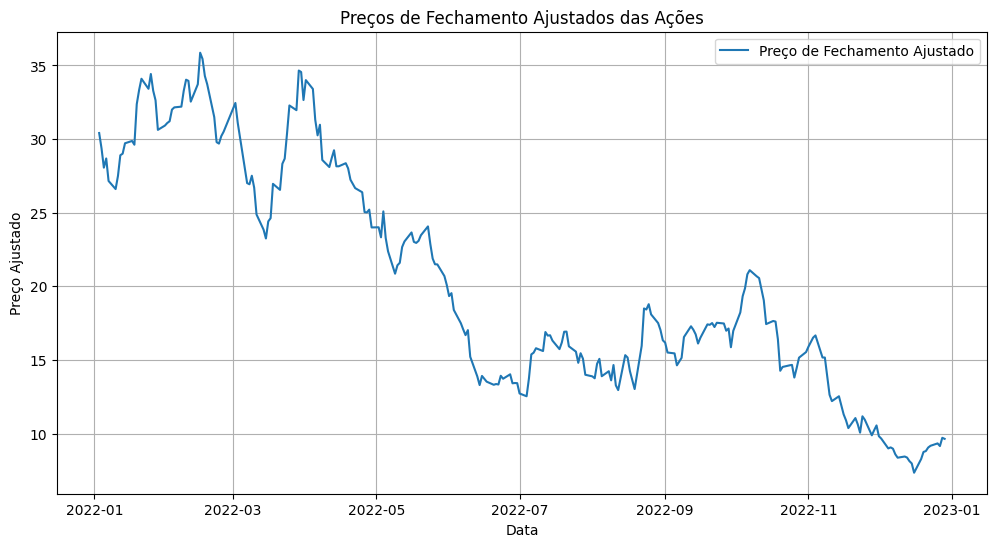

In [192]:

# Converter a coluna 'date' para datetime e definir como índice
df_2022['date'] = pd.to_datetime(df_2022['date'])


# Plotando o gráfico de preços de fechamento ajustados
plt.figure(figsize=(12, 6))
plt.plot(df_2022['date'], df_2022['adjClose'], label='Preço de Fechamento Ajustado')
plt.title('Preços de Fechamento Ajustados das Ações')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
df_2023

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2023-12-28,0.92,0.93,0.90,0.91,0.91,15588200,15588200,-0.01,-1.09000,0.91333,"December 28, 23",-0.010900
1,2023-12-27,0.91,0.92,0.90,0.92,0.92,11642500,11642500,0.01,1.10000,0.91333,"December 27, 23",0.011000
2,2023-12-26,0.93,0.94,0.91,0.91,0.91,16149200,16149200,-0.02,-2.15000,0.92000,"December 26, 23",-0.021500
3,2023-12-22,0.94,0.95,0.91,0.92,0.92,31674100,31674100,-0.02,-2.13000,0.92667,"December 22, 23",-0.021300
4,2023-12-21,0.96,0.97,0.92,0.93,0.93,25243300,25243300,-0.03,-3.12000,0.94000,"December 21, 23",-0.031200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-01-06,9.70,10.43,9.58,10.41,10.41,29043100,29043100,0.71,7.32000,10.14000,"January 06, 23",0.073200
244,2023-01-05,8.80,9.82,8.60,9.69,9.69,42627600,42627600,0.89,10.11000,9.37000,"January 05, 23",0.101100
245,2023-01-04,8.65,8.80,8.40,8.73,8.73,24618000,24618000,0.08,0.92486,8.64000,"January 04, 23",0.009249
246,2023-01-03,9.08,9.27,8.40,8.52,8.52,28991700,28991700,-0.56,-6.17000,8.73000,"January 03, 23",-0.061700


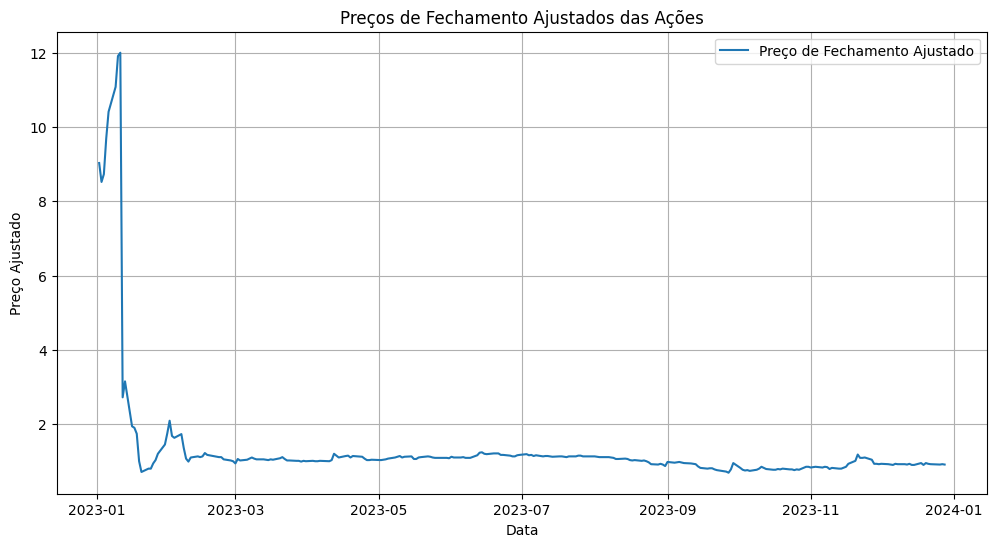

In [193]:
# Converter a coluna 'date' para datetime e definir como índice
df_2023['date'] = pd.to_datetime(df_2023['date'])


# Plotando o gráfico de preços de fechamento ajustados
plt.figure(figsize=(12, 6))
plt.plot(df_2023['date'], df_2023['adjClose'], label='Preço de Fechamento Ajustado')
plt.title('Preços de Fechamento Ajustados das Ações')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
def get_data(metrics,symbol, annual, api_key):
    """
    Obtém dados históricos da ação para o período especificado.
    """
    url = f"https://financialmodelingprep.com/api/v3/{metrics}/{symbol}?period={annual}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

In [156]:
metrics_cash = get_data("cash-flow-statement-growth", stock_symbol,"2023", api_key)
metrics_cash  

[{'date': '2022-12-31',
  'symbol': 'AMER3.SA',
  'calendarYear': '2022',
  'period': 'FY',
  'growthNetIncome': -24.74339227098447,
  'growthDepreciationAndAmortization': 0.23682834317214901,
  'growthDeferredIncomeTax': 0,
  'growthStockBasedCompensation': 0,
  'growthChangeInWorkingCapital': 2.161487033477057,
  'growthAccountsReceivables': 0,
  'growthInventory': 3.332283420990359,
  'growthAccountsPayables': 0,
  'growthOtherWorkingCapital': 1.1076398640588083,
  'growthOtherNonCashItems': 6.5229270745651915,
  'growthNetCashProvidedByOperatingActivites': -6.518423688516549,
  'growthInvestmentsInPropertyPlantAndEquipment': -0.34652298208572097,
  'growthAcquisitionsNet': -0.6571843110379353,
  'growthPurchasesOfInvestments': -1,
  'growthSalesMaturitiesOfInvestments': -1,
  'growthOtherInvestingActivites': 1.6310557710398657,
  'growthNetCashUsedForInvestingActivites': -1.088248283571049,
  'growthDebtRepayment': 0.7537979462004578,
  'growthCommonStockIssued': 5.30780802817935,


| Campo                                      | Descrição                                                                       |
|--------------------------------------------|---------------------------------------------------------------------------------|
| `date`                                     | Data a que se referem os dados, geralmente o final de um período fiscal.         |
| `symbol`                                   | Símbolo de ticker da ação na bolsa de valores.                                  |
| `calendarYear`                             | Ano do calendário a que se referem os dados.                                    |
| `period`                                   | Período dos dados reportados (ex: "FY" para ano fiscal).                        |
| `growthNetIncome`                          | Variação percentual no lucro líquido em comparação com o período anterior.      |
| `growthDepreciationAndAmortization`        | Variação percentual nas despesas de depreciação e amortização.                  |
| `growthDeferredIncomeTax`                  | Variação percentual no imposto de renda diferido.                               |
| `growthStockBasedCompensation`             | Variação percentual na compensação baseada em ações.                            |
| `growthChangeInWorkingCapital`             | Variação percentual no capital de giro.                                         |
| `growthAccountsReceivables`                | Variação percentual nas contas a receber.                                       |
| `growthInventory`                          | Variação percentual no inventário.                                              |
| `growthAccountsPayables`                   | Variação percentual nas contas a pagar.                                         |
| `growthOtherWorkingCapital`                | Variação percentual em outros componentes do capital de giro.                   |
| `growthOtherNonCashItems`                  | Variação percentual em outros itens não monetários.                             |
| `growthNetCashProvidedByOperatingActivites`| Variação percentual no fluxo de caixa líquido das atividades operacionais.       |
| `growthInvestmentsInPropertyPlantAndEquipment`| Variação percentual nos investimentos em propriedades, fábricas e equipamentos.|
| `growthAcquisitionsNet`                    | Variação percentual nas aquisições líquidas.                                    |
| `growthPurchasesOfInvestments`             | Variação percentual nas compras de investimentos.                               |
| `growthSalesMaturitiesOfInvestments`       | Variação percentual nas vendas e vencimentos de investimentos.                  |
| `growthOtherInvestingActivites`            | Variação percentual em outras atividades de investimento.                       |
| `growthNetCashUsedForInvestingActivites`   | Variação percentual no fluxo de caixa líquido usado para atividades de investimento.|
| `growthDebtRepayment`                      | Variação percentual no pagamento de dívidas.                                    |
| `growthCommonStockIssued`                  | Variação percentual na emissão de ações ordinárias.                             |
| `growthCommonStockRepurchased`             | Variação percentual na recompra de ações ordinárias.                            |
| `growthDividendsPaid`                      | Variação percentual nos dividendos pagos.                                       |
| `growthOtherFinancingActivites`            | Variação percentual em outras atividades de financiamento.                      |
| `growthNetCashUsedProvidedByFinancingActivities`| Variação percentual no fluxo de caixa líquido usado ou fornecido por atividades de financiamento.|
| `growthEffectOfForexChangesOnCash`         | Variação percentual no efeito das mudanças nas taxas de câmbio no caixa.        |
| `growthNetChangeInCash`                    | Variação percentual na mudança líquida em caixa.                                |
| `growthCashAtEndOfPeriod`                  | Variação percentual no caixa no final do período.                               |
| `growthCashAtBeginningOfPeriod`            | Variação percentual no caixa no início do período.                              |
| `growthOperatingCashFlow`                  | Variação percentual no fluxo de caixa operacional.                              |
| `growthCapitalExpenditure`                 | Variação percentual nos gastos de capital.                                      |
| `growthFreeCashFlow`                       | Variação percentual no fluxo de caixa livre.                                    |


In [199]:
df  = pd.DataFrame(metrics_cash)
df

,date,symbol,calendarYear,period,growthNetIncome,growthDepreciationAndAmortization,growthDeferredIncomeTax,growthStockBasedCompensation,growthChangeInWorkingCapital,growthAccountsReceivables,...,growthDividendsPaid,growthOtherFinancingActivites,growthNetCashUsedProvidedByFinancingActivities,growthEffectOfForexChangesOnCash,growthNetChangeInCash,growthCashAtEndOfPeriod,growthCashAtBeginningOfPeriod,growthOperatingCashFlow,growthCapitalExpenditure,growthFreeCashFlow
0,2022-12-31,AMER3.SA,2022,FY,-24.743392,0.236828,0,0,2.161487,0,...,0,20.329508,1.945041,0,0.962064,-0.084865,-0.604154,-6.518424,-0.346523,-2.546663
1,2021-12-31,AMER3.SA,2021,FY,3.695283,1.160804,0,0,-4.741728,0,...,0,-1.109975,-2.311329,0,-2.267524,-0.591985,0.876315,-12.366938,-1.800194,-2.898904
2,2020-12-31,AMER3.SA,2020,FY,0.366015,0.151250,0,0,-4.033228,0,...,0,0.857342,1.598292,0,6.450795,0.876315,0.133290,-1.391090,-0.201410,-1.083589
3,2019-12-31,AMER3.SA,2019,FY,0.200234,0.201196,0,0,-0.785940,0,...,0,-0.105609,2.615230,0,-0.748033,0.133290,1.123136,-0.633694,-0.165987,-6.569712
4,2018-12-31,AMER3.SA,2018,FY,0.033603,0.297307,0,0,10.758600,0,...,0,-0.105376,-0.836592,0,0.325393,1.123136,5.553013,1.974580,-0.000092,1.062247


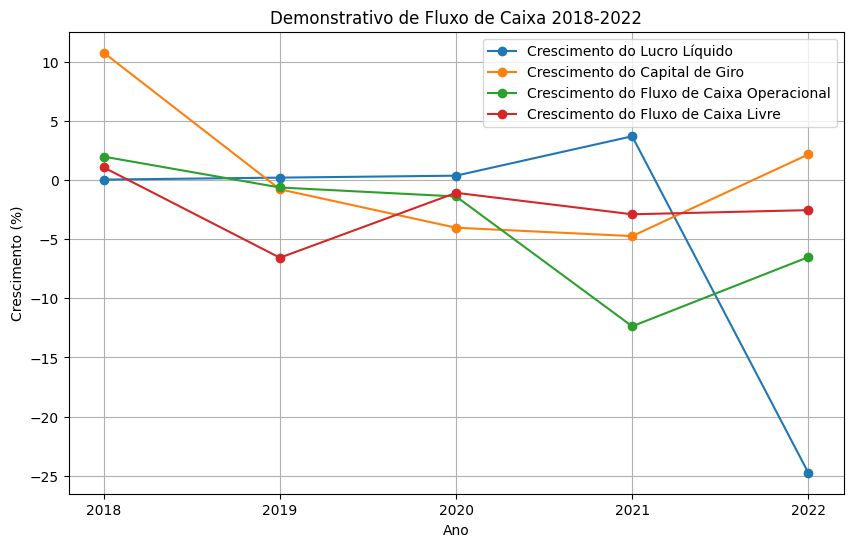

In [173]:

# Plotando a análise de tendência
plt.figure(figsize=(10, 6))

df['calendarYear'] = df['calendarYear'].astype(int)

years = df['calendarYear'].unique()


plt.plot(df['calendarYear'],df['growthNetIncome'], label='Crescimento do Lucro Líquido', marker='o')
plt.plot(df['calendarYear'],df['growthChangeInWorkingCapital'], label='Crescimento do Capital de Giro ', marker='o')
plt.plot(df['calendarYear'],df['growthOperatingCashFlow'], label='Crescimento do Fluxo de Caixa Operacional', marker='o')
plt.plot(df['calendarYear'],df['growthFreeCashFlow'], label='Crescimento do Fluxo de Caixa Livre', marker='o')

plt.title('Demonstrativo de Fluxo de Caixa 2018-2022')
plt.xlabel('Ano')
plt.ylabel('Crescimento (%)')
plt.xticks(years)
plt.legend()

plt.grid(True)
plt.show()


In [201]:
# Selecionando as colunas desejadas
columns_to_save = ['calendarYear', 'growthNetIncome', 'growthChangeInWorkingCapital', 
                   'growthOperatingCashFlow', 'growthFreeCashFlow']
df_demonstrativo = df[columns_to_save]
df_demonstrativo.to_csv(f'demostrantivo-fluxo-caixa-{stock_symbol}.csv', index=False)


In [205]:
df_2022.to_csv(f'acoes-precos-{stock_symbol}.csv', index=False)

In [203]:
def upload_blob(project_id, bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(f"Arquivo {source_file_name} upado {destination_blob_name}.")


In [ ]:
upload_blob('spheric-verve-405817', 'datalakedescomplica', f'demostrantivo-fluxo-caixa-{stock_symbol}.csv', 'Dados/'+f'demostrantivo-fluxo-caixa-{stock_symbol}.csv')